# AI Impect on Job Market

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# CSV File loading

In [13]:
import pandas as pd

# Load with pandas—much better for real-world CSVs
df = pd.read_csv(r'D:\ai_job_trends_dataset.csv')

# Peek at data
print("Shape of data:", df.shape)
display(df.head())


Shape of data: (30000, 13)


,Job Title,Industry,Job Status,AI Impact Level,Median Salary (USD),Required Education,Experience Required (Years),Job Openings (2024),Projected Openings (2030),Remote Work Ratio (%),Automation Risk (%),Location,Gender Diversity (%)
0,Investment analyst,IT,Increasing,Moderate,42109.76,Master’s Degree,5,1515,6342,55.96,28.28,UK,44.63
1,"Journalist, newspaper",Manufacturing,Increasing,Moderate,132298.57,Master’s Degree,15,1243,6205,16.81,89.71,USA,66.39
2,Financial planner,Finance,Increasing,Low,143279.19,Bachelor’s Degree,4,3338,1154,91.82,72.97,Canada,41.13
3,Legal secretary,Healthcare,Increasing,High,97576.13,Associate Degree,15,7173,4060,1.89,99.94,Australia,65.76
4,Aeronautical engineer,IT,Increasing,Low,60956.63,Master’s Degree,13,5944,7396,53.76,37.65,Germany,72.57


## Dataset Overview

In [15]:
# Shape and info
print(f"Dataset shape: {df.shape}")
df.info()
#df.describe(include='all')

Dataset shape: (30000, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Job Title                    30000 non-null  object 
 1   Industry                     30000 non-null  object 
 2   Job Status                   30000 non-null  object 
 3   AI Impact Level              30000 non-null  object 
 4   Median Salary (USD)          30000 non-null  float64
 5   Required Education           30000 non-null  object 
 6   Experience Required (Years)  30000 non-null  int64  
 7   Job Openings (2024)          30000 non-null  int64  
 8   Projected Openings (2030)    30000 non-null  int64  
 9   Remote Work Ratio (%)        30000 non-null  float64
 10  Automation Risk (%)          30000 non-null  float64
 11  Location                     30000 non-null  object 
 12  Gender Diversity (%)         30000 non-null  fl

## Data Cleaning


In [16]:
# Missing values
print(df.isnull().sum())

# Duplicates
print(f"Duplicate rows: {df.duplicated().sum()}")


Job Title                      0
Industry                       0
Job Status                     0
AI Impact Level                0
Median Salary (USD)            0
Required Education             0
Experience Required (Years)    0
Job Openings (2024)            0
Projected Openings (2030)      0
Remote Work Ratio (%)          0
Automation Risk (%)            0
Location                       0
Gender Diversity (%)           0
dtype: int64
Duplicate rows: 0


# Column Name 

In [66]:
df.columns

Index(['Job Title', 'Industry', 'Job Status', 'AI Impact Level',
       'Median Salary (USD)', 'Required Education',
       'Experience Required (Years)', 'Job Openings (2024)',
       'Projected Openings (2030)', 'Remote Work Ratio (%)',
       'Automation Risk (%)', 'Location', 'Gender Diversity (%)'],
      dtype='object')

# Slicing

In [31]:
# Slice first 5 rows
print(df[:5])

               Job Title       Industry  Job Status AI Impact Level  \
0     Investment analyst             IT  Increasing        Moderate   
1  Journalist, newspaper  Manufacturing  Increasing        Moderate   
2      Financial planner        Finance  Increasing             Low   
3        Legal secretary     Healthcare  Increasing            High   
4  Aeronautical engineer             IT  Increasing             Low   

   Median Salary (USD) Required Education  Experience Required (Years)  \
0             42109.76    Master’s Degree                            5   
1            132298.57    Master’s Degree                           15   
2            143279.19  Bachelor’s Degree                            4   
3             97576.13   Associate Degree                           15   
4             60956.63    Master’s Degree                           13   

   Job Openings (2024)  Projected Openings (2030)  Remote Work Ratio (%)  \
0                 1515                       6342   

In [28]:
# Slice specific column
print(df['Job Title'][:10])  # First 10 job titles


0                       Investment analyst
1                    Journalist, newspaper
2                        Financial planner
3                          Legal secretary
4                    Aeronautical engineer
5                          Legal secretary
6                      Surveyor, insurance
7                                  Dentist
8    Emergency planning/management officer
9                      Visual merchandiser
Name: Job Title, dtype: object


In [30]:
# Slice multiple columns
print(df[['Job Title', 'Median Salary (USD)']][:10])

                               Job Title  Median Salary (USD)
0                     Investment analyst             42109.76
1                  Journalist, newspaper            132298.57
2                      Financial planner            143279.19
3                        Legal secretary             97576.13
4                  Aeronautical engineer             60956.63
5                        Legal secretary             39123.32
6                    Surveyor, insurance            147150.03
7                                Dentist             64245.48
8  Emergency planning/management officer             72488.15
9                    Visual merchandiser             95840.30


# Top Jobs

In [54]:
top_jobs = df['Job Title'].value_counts().head(5).index
filtered_df = df[df['Job Title'].isin(top_jobs)]
print(top_jobs)

Index(['Surveyor, insurance', 'Counselling psychologist', 'Charity officer',
       'Surveyor, land/geomatics', 'Hydrogeologist'],
      dtype='object')


# Statistical Functions

In [32]:
# Choose a column to analyze
col = df['Median Salary (USD)']

# Apply statistics
print("Mean:", np.mean(col))
print("Median:", np.median(col))
print("Mode:", col.mode().iloc[0])
print("Standard Deviation:", np.std(col))
print("Variance:", np.var(col))

Mean: 90119.96563866621
Median: 90274.11499999999
Mode: 33841.64
Standard Deviation: 34411.44041458704
Variance: 1184147231.4066744


# Statistics for All Columns

In [35]:
print(df.describe(include='all'))  

                  Job Title       Industry  Job Status AI Impact Level  \
count                 30000          30000       30000           30000   
unique                  639              8           2               3   
top     Surveyor, insurance  Entertainment  Increasing        Moderate   
freq                     75           3895       15136           10042   
mean                    NaN            NaN         NaN             NaN   
std                     NaN            NaN         NaN             NaN   
min                     NaN            NaN         NaN             NaN   
25%                     NaN            NaN         NaN             NaN   
50%                     NaN            NaN         NaN             NaN   
75%                     NaN            NaN         NaN             NaN   
max                     NaN            NaN         NaN             NaN   

        Median Salary (USD) Required Education  Experience Required (Years)  \
count          30000.000000     

#  Data Visualization

## Bar chart with line ploat

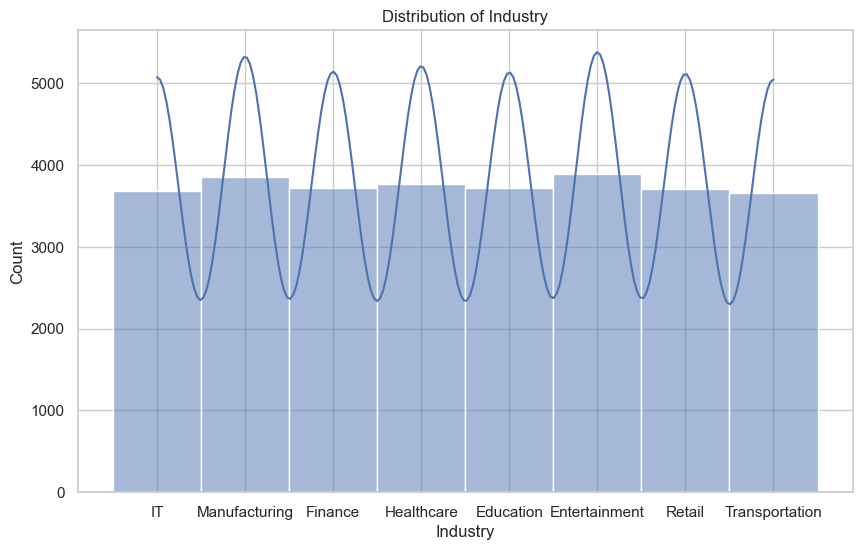

In [25]:

plt.figure(figsize=(10,6))
sns.histplot(df['Industry'], kde=True)
plt.title('Distribution of Industry')
plt.show()

# Correlation

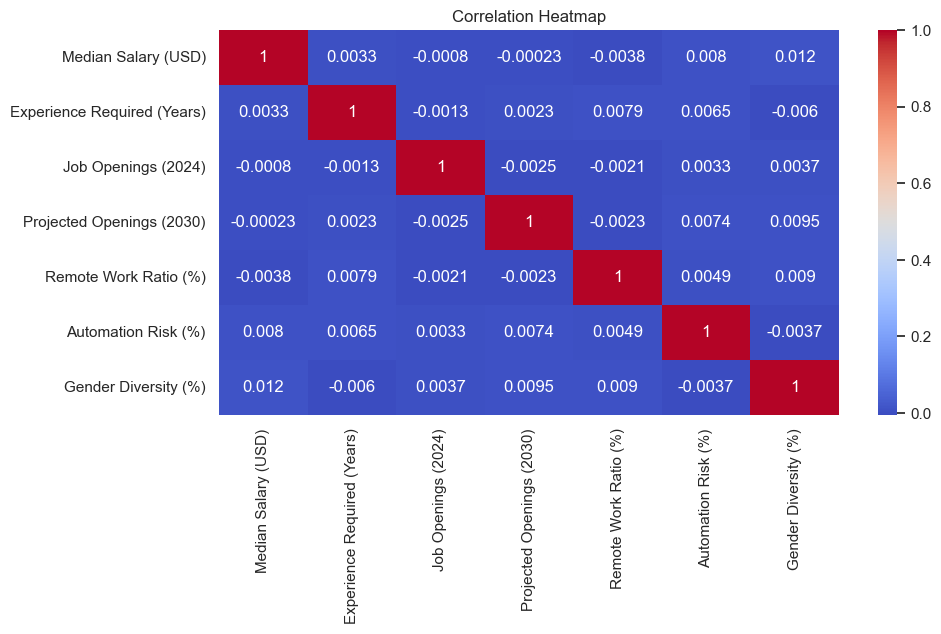

In [22]:
# Correlation heatmap (for numeric columns)
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


# Pie chat 

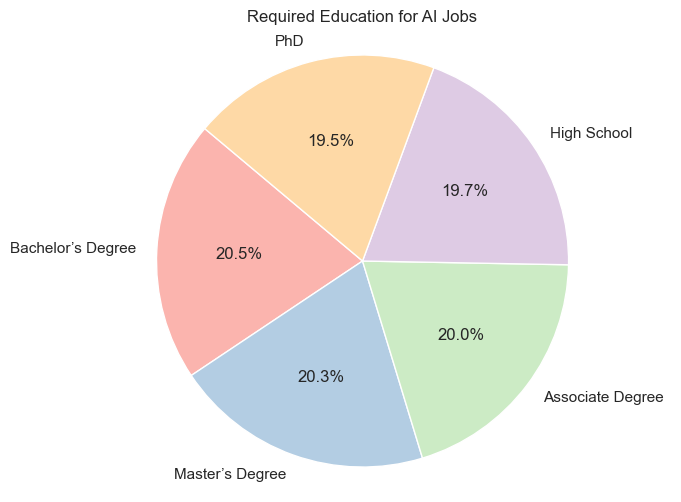

In [56]:
edu_counts = df['Required Education'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(edu_counts, labels=edu_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Pastel1.colors)
plt.title('Required Education for AI Jobs')
plt.axis('equal')  # Ensures pie is a circle
plt.show()

# Bar Chart

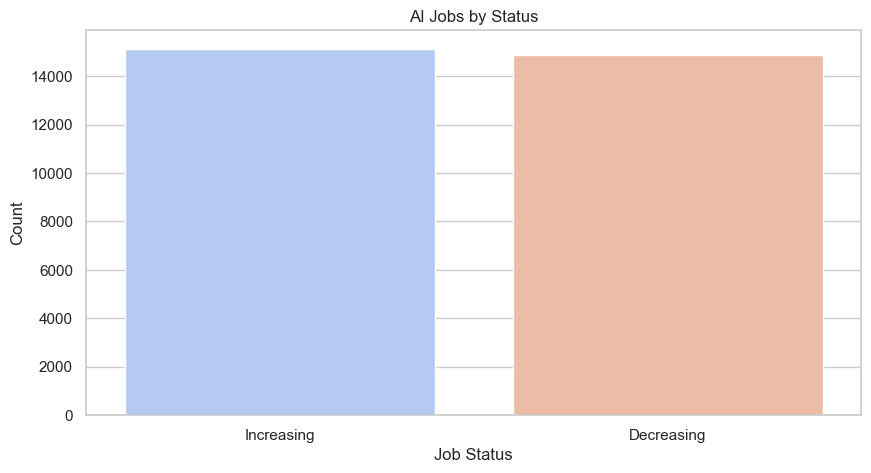

In [44]:
plt.figure(figsize=(10,5))

job_status_order = df['Job Status'].value_counts().index

sns.countplot(data=df, x='Job Status', order=job_status_order, palette='coolwarm')
plt.title('AI Jobs by Status')
plt.xlabel('Job Status')
plt.ylabel('Count')
plt.show()




# Stacked Bar Chart

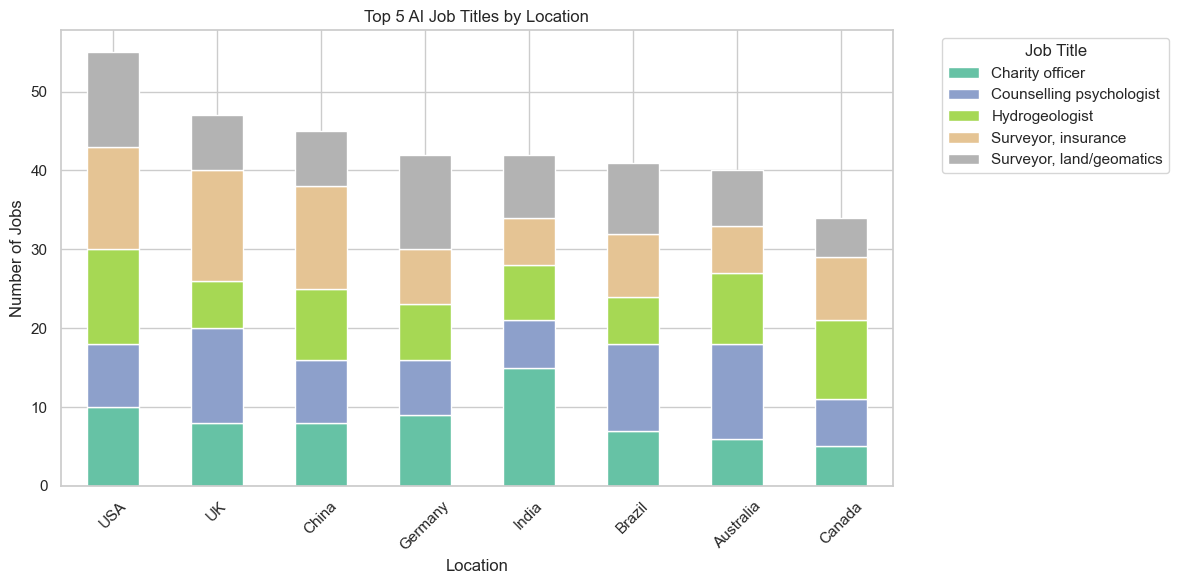

In [57]:
job_location_counts_top.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='Set2')
plt.title('Top 5 AI Job Titles by Location')
plt.xlabel('Location')
plt.ylabel('Number of Jobs')
plt.xticks(rotation=45)
plt.legend(title='Job Title', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Violine Plot

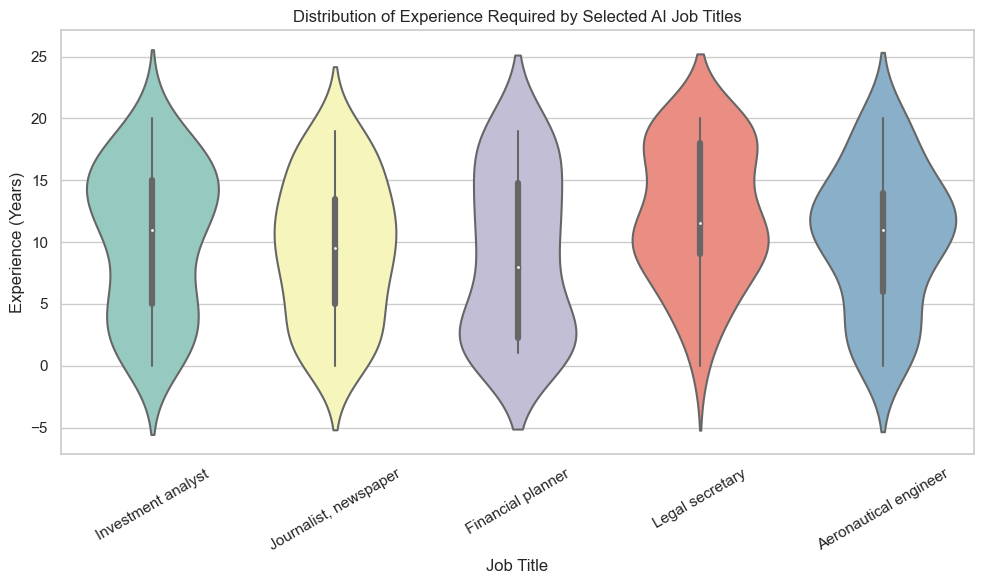

In [62]:
selected_jobs = [
    'Investment analyst',
    'Journalist, newspaper',
    'Financial planner',
    'Legal secretary',
    'Aeronautical engineer'
]
# Create violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(data=filtered_df, x='Job Title', y='Experience Required (Years)', palette='Set3')
plt.title('Distribution of Experience Required by Selected AI Job Titles')
plt.xlabel('Job Title')
plt.ylabel('Experience (Years)')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()



# Area chart

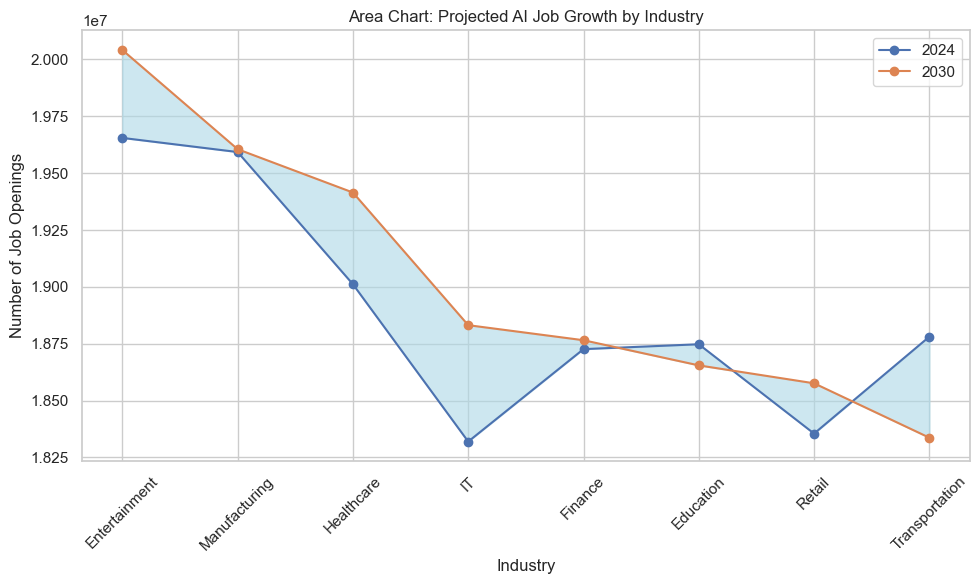

In [63]:
plt.figure(figsize=(10,6))
plt.fill_between(industry_growth_sorted.index, industry_growth_sorted['Job Openings (2024)'],
                 industry_growth_sorted['Projected Openings (2030)'],
                 color='lightblue', alpha=0.6)
plt.plot(industry_growth_sorted.index, industry_growth_sorted['Job Openings (2024)'], label='2024', marker='o')
plt.plot(industry_growth_sorted.index, industry_growth_sorted['Projected Openings (2030)'], label='2030', marker='o')
plt.title('Area Chart: Projected AI Job Growth by Industry')
plt.xlabel('Industry')
plt.ylabel('Number of Job Openings')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()
